# Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries

In [9]:
data = pd.read_csv("C:/Users/senth/Downloads/world_population.csv")

In [10]:
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [11]:
data.shape

(234, 17)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [13]:
data.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

# Exploratory Data Analysis

Let's begin some exploratory data analysis! Start by checking out missing data!

In [14]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

No Null Values! So, filling is not required

#### Finding number of countries in a continent 

In [19]:
data['Continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

<AxesSubplot:>

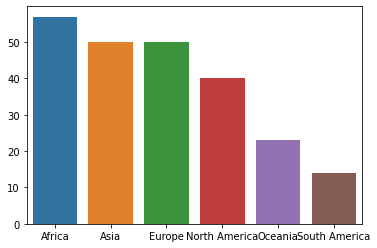

In [23]:
countryList = data["Continent"].value_counts()
sns.barplot(x=countryList.index, y=countryList.values)

#### Finding the population percentage of each continent 

In [24]:
PopPercentage = data.groupby('Continent')['World Population Percentage'].sum().round(1).sort_values(ascending= False).reset_index()

In [25]:
PopPercentage

,Continent,World Population Percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


In [28]:
label = PopPercentage['Continent']
label

0             Asia
1           Africa
2           Europe
3    North America
4    South America
5          Oceania
Name: Continent, dtype: object

In [30]:
percent = PopPercentage['World Population Percentage']
percent

0    59.2
1    17.9
2     9.3
3     7.5
4     5.5
5     0.6
Name: World Population Percentage, dtype: float64

<AxesSubplot:ylabel='World Population Percentage'>

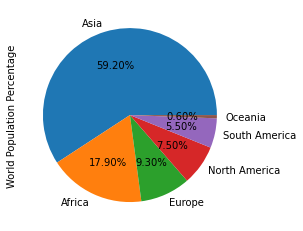

In [32]:
percent.plot.pie(labels = label, autopct = '%1.2f%%')

### Comparing the continent population 1970 and 2022

In [34]:
btw = data.groupby('Continent')[['1970 Population','2022 Population']].sum().sort_values(by = 'Continent', ascending= True).reset_index()
btw

,Continent,1970 Population,2022 Population
0,Africa,365444348,1426730932
1,Asia,2144906290,4721383274
2,Europe,655923991,743147538
3,North America,315434606,600296136
4,Oceania,19480270,45038554
5,South America,192947156,436816608


In [35]:
btw['Percentage'] = round(btw['1970 Population']/ btw['2022 Population']*100,2)
btw

,Continent,1970 Population,2022 Population,Percentage
0,Africa,365444348,1426730932,25.61
1,Asia,2144906290,4721383274,45.43
2,Europe,655923991,743147538,88.26
3,North America,315434606,600296136,52.55
4,Oceania,19480270,45038554,43.25
5,South America,192947156,436816608,44.17


In [36]:
data.groupby('Country')['2022 Population'].sum().sort_values(ascending=False).head()

Country
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Name: 2022 Population, dtype: int64

## Highest Population

In [37]:
highPop = data[['Country','2022 Population']].sort_values(by = '2022 Population', ascending = False).head().reset_index()
highPop

,index,Country,2022 Population
0,41,China,1425887337
1,92,India,1417173173
2,221,United States,338289857
3,93,Indonesia,275501339
4,156,Pakistan,235824862


## Least Population 

In [38]:
leastPop = data[['Country','2022 Population']].sort_values(by = '2022 Population', ascending = True).head().reset_index()
leastPop

,index,Country,2022 Population
0,226,Vatican City,510
1,209,Tokelau,1871
2,150,Niue,1934
3,64,Falkland Islands,3780
4,137,Montserrat,4390


### Top 5 Countries from the continent 

In [39]:
def topFive(Continent):
    cont = data[data['Continent'] == Continent]
    return cont.groupby('Country')['2022 Population'].sum().sort_values(ascending = False).head()

In [40]:
topFive('Asia')

Country
China         1425887337
India         1417173173
Indonesia      275501339
Pakistan       235824862
Bangladesh     171186372
Name: 2022 Population, dtype: int64

In [41]:
topFive('Europe')

Country
Russia            144713314
Germany            83369843
United Kingdom     67508936
France             64626628
Italy              59037474
Name: 2022 Population, dtype: int64

In [42]:
topFive('South America')

Country
Brazil       215313498
Colombia      51874024
Argentina     45510318
Peru          34049588
Venezuela     28301696
Name: 2022 Population, dtype: int64

In [43]:
topFive('North America')

Country
United States    338289857
Mexico           127504125
Canada            38454327
Guatemala         17843908
Haiti             11584996
Name: 2022 Population, dtype: int64

In [44]:
topFive('Africa')

Country
Nigeria     218541212
Ethiopia    123379924
Egypt       110990103
DR Congo     99010212
Tanzania     65497748
Name: 2022 Population, dtype: int64

## Bottom 5 countries from continent 

In [45]:
def bottomFive(Continent):
    cont = data[data['Continent'] == Continent]
    return cont.groupby('Country')['2020 Population'].sum().sort_values(ascending = True).head()

In [46]:
bottomFive('Africa')

Country
Seychelles               105530
Sao Tome and Principe    218641
Mayotte                  305587
Western Sahara           556048
Cape Verde               582640
Name: 2020 Population, dtype: int64

In [47]:
bottomFive('Europe')

Country
Vatican City       520
Gibraltar        32709
San Marino       34007
Monaco           36922
Liechtenstein    38756
Name: 2020 Population, dtype: int64

In [48]:
bottomFive('South America')

Country
Falkland Islands       3747
French Guiana        290969
Suriname             607065
Guyana               797202
Uruguay             3429086
Name: 2020 Population, dtype: int64

In [49]:
bottomFive('Asia')

Country
Brunei          441725
Maldives        514438
Macau           676283
Bhutan          772506
Timor-Leste    1299995
Name: 2020 Population, dtype: int64

In [50]:
bottomFive('North America')

Country
Montserrat                    4500
Saint Pierre and Miquelon     5906
Saint Barthelemy             10681
Anguilla                     15585
British Virgin Islands       30910
Name: 2020 Population, dtype: int64

## Top 10 Growth rate country

In [51]:
data.sort_values(by = 'Growth Rate', ascending = False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33
202,60,SYR,Syria,Damascus,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180,119.4797,1.0376,0.28
189,116,SVK,Slovakia,Bratislava,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,49037,115.0856,1.0359,0.07
55,15,COD,DR Congo,Kinshasa,Africa,99010212,92853164,78656904,66391257,48616317,35987541,26708686,20151733,2344858,42.2244,1.0325,1.24
130,182,MYT,Mayotte,Mamoudzou,Africa,326101,305587,249545,211786,159215,92659,52233,35383,374,871.9278,1.0319,0.00
39,69,TCD,Chad,N'Djamena,Africa,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000,13.8032,1.0316,0.22
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
124,59,MLI,Mali,Bamako,Africa,22593590,21224040,18112907,15529181,11239101,8945026,7372581,6153587,1240192,18.2178,1.0314,0.28


In [52]:
topTen = data.groupby('Country')['2022 Population'].sum().sort_values(ascending = False).head(10).reset_index()  
topTen

,Country,2022 Population
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862
5,Nigeria,218541212
6,Brazil,215313498
7,Bangladesh,171186372
8,Russia,144713314
9,Mexico,127504125


## Least Growth Rate Country

In [53]:
leastTen = data.groupby('Country')['2022 Population'].sum().sort_values(ascending = True).head(10).reset_index()  
leastTen

,Country,2022 Population
0,Vatican City,510
1,Tokelau,1871
2,Niue,1934
3,Falkland Islands,3780
4,Montserrat,4390
5,Saint Pierre and Miquelon,5862
6,Saint Barthelemy,10967
7,Tuvalu,11312
8,Wallis and Futuna,11572
9,Nauru,12668


#### Finding the growth rate by each continents 

In [55]:
growthRate = data.groupby('Continent')['Growth Rate'].sum().reset_index()
totalGrowthRate = data['Growth Rate'].sum()
growthRate['Per Growth Rate'] = round(growthRate['Growth Rate']/totalGrowthRate*100,2)

In [56]:
growthRate

,Continent,Growth Rate,Per Growth Rate
0,Africa,58.2109,24.64
1,Asia,50.4692,21.36
2,Europe,50.1128,21.21
3,North America,40.1670,17.00
4,Oceania,23.1698,9.81
5,South America,14.1114,5.97


## COUNTRY VS AREA

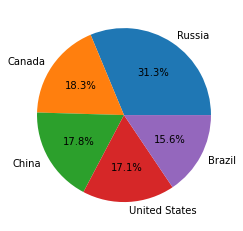

In [57]:
population_2022=data.sort_values(by="Area (km²)",ascending=False).head()
x=population_2022["Country"]
y=population_2022["Area (km²)"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

Russia is the top countries according to the area which occupies 23.2%

## COUNTRY VS GROWTH RATE 

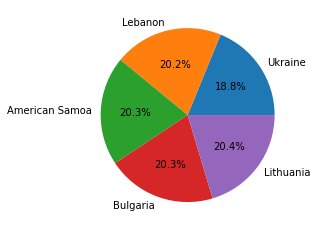

In [58]:
population_2022=data.sort_values(by="Growth Rate",ascending=True).head()
x=population_2022["Country"]
y=population_2022["Growth Rate"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

In [59]:
data["Growth Rate"].describe()

count    234.000000
mean       1.009577
std        0.013385
min        0.912000
25%        1.001775
50%        1.007900
75%        1.016950
max        1.069100
Name: Growth Rate, dtype: float64

### COUNTRY VS WORLD POPULATION PERCENTAGE 

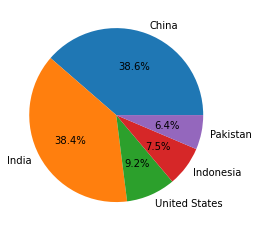

In [60]:
population_2022=data.sort_values(by="World Population Percentage",ascending=False).head()
x=population_2022["Country"]
y=population_2022["World Population Percentage"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()